# Домашняя работа №1. Введение в математическую статистику

**Disclaimer**: 

Для каждой домашней работы обозначаются мягкие и жесткие дедлайны. За каждый день просрочки после мягкого дедлайна снимается 20% от оценки.

После жёсткого дедлайна работы не принимаются. Даже при опоздании на одну секунду. Сдавайте заранее.

Cтудент может 1 раз сдать домашнее задание после мягкого дедлайна (но до жёсткого) без штрафов.

В случае использования больших языковых моделей (large language models (LLMs), к примеру: ChatGPT, GigaChat, Qwen, etc):
- В chunk (ячейку) выше кода, созданного LLM, прикрепляйте промпт, который использовался для генерации.
- Отдельно опишите как подбирали промпты, какие заметили преимущества и недостатки GenAI для данного задания.
- За решение с указанным промптом - _штраф 40%_ для конкретного задания, который может быть пересмотрен в сторону увеличения в следующих случаях: 
    - использован ответ LLM без указания промпта _(штраф 100%)_
    - решение избыточно и, или написано неоптимально (использование magic команд без необходимости, использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, etc) _(штраф 50%)_

Также: 
- Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.
- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.
- Мы в любом случае оставляем за собой право пригласить студента для защиты своего ДЗ, если заподозрим плагиат.

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

## Задание 1. Работа с генерацией (50 баллов)

Цель данного простого задания заключается в повторении пройденного материала на первом занятии и знакомстве с методами моделирования случайных величин, доступными в Python.

#### 1. Описательные статистики.

В ноутбуке, приложенном к занятию, был рассмотрим пример с нормальным распределением. Здесь же мы рассмотрим другое важное распределение - экспоненциальное

* **(5 баллов)** Сгенерируйте 3 выборки из экспоненциального распределения с параметром $\lambda = 0.2$ https://en.wikipedia.org/wiki/Exponential_distribution (внимательно посмотрите в документацию https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html, чтобы правильно передать параметры распредения) размера 100, 1000, 10000. Какая выборочная статистика поможет вам понять, что параметр распределения передан правильно и согласуется с теоретической формулой? Посчитатайте её и сравните с теоретическим значением, которое должно получиться по формуле из Википедии.

In [70]:
lambda_param = 0.2
scale = 1 / lambda_param

# Генерация выборок
sample_100 = stats.expon.rvs(scale=scale, size=100)
sample_1000 = stats.expon.rvs(scale=scale, size=1000)
sample_10000 = stats.expon.rvs(scale=scale, size=10000)

# Вычисление выборочного среднего для каждой выборки
mean_100 = np.mean(sample_100)
mean_1000 = np.mean(sample_1000)
mean_10000 = np.mean(sample_10000)
print(f"Выборочное среднее (n=100): {mean_100:.4f}")
print(f"Выборочное среднее (n=1000): {mean_1000:.4f}")
print(f"Выборочное среднее (n=10000): {mean_10000:.4f}")

# Теоретическое среднее (μ = scale)
theoretical_mean = scale
print("Теоретическое среднее:", theoretical_mean)

Выборочное среднее (n=100): 4.7818
Выборочное среднее (n=1000): 4.9456
Выборочное среднее (n=10000): 4.9423
Теоретическое среднее: 5.0


Выборочное среднее стремится к теоретическому значению (μ = 5) при увеличении размера выборки.
Это подтверждает, что параметр scale передан правильно, так как выборочная статистика согласуется с теорией.

* **(5 баллов)** Посчитайте выборочные статистики, рассказанные на лекции (среднее, дисперсия, среднеквадратичное отклонение, медиана, квартили), и сравните их с теоретическими аналогами (воспользуйтесь методами класса stats.expon, а не считайте руками) для каждой выборки. Насколько сильным получилось отклонение от теоретического значения? Влияет ли размер выборки на величину отклонения? Если да, то как?

In [86]:
# Теоретические значения
mean_th = stats.expon.mean(scale=scale)
var_th = stats.expon.var(scale=scale)
std_th = stats.expon.std(scale=scale)
median_th = stats.expon.median(scale=scale)
Q1_th = stats.expon.ppf(0.25, scale=scale)
Q3_th = stats.expon.ppf(0.75, scale=scale)

# Вычисление выборочных статистик
var_100 = np.var(sample_100, ddof=0)
std_100 = np.std(sample_100, ddof=0)
median_100 = np.median(sample_100)
Q1_100 = np.quantile(sample_100, 0.25)
Q3_100 = np.quantile(sample_100, 0.75)
mean_deviation_100 = abs(mean_100 - mean_th) / mean_th * 100
var_deviation_100 = abs(var_100 - var_th) / var_th * 100
std_deviation_100 = abs(std_100 - std_th) / std_th * 100
median_deviation_100 = abs(median_100 - median_th) / median_th * 100
Q1_deviation_100 = abs(Q1_100 - Q1_th) / Q1_th * 100
Q3_deviation_100 = abs(Q3_100 - Q3_th) / Q3_th * 100

var_1000 = np.var(sample_1000, ddof=0)
std_1000 = np.std(sample_1000, ddof=0)
median_1000 = np.median(sample_1000)
Q1_1000 = np.quantile(sample_1000, 0.25)
Q3_1000 = np.quantile(sample_1000, 0.75)
mean_deviation_1000 = abs(mean_1000 - mean_th) / mean_th * 100
var_deviation_1000 = abs(var_1000 - var_th) / var_th * 100
std_deviation_1000 = abs(std_1000 - std_th) / std_th * 100
median_deviation_1000 = abs(median_1000 - median_th) / median_th * 100
Q1_deviation_1000 = abs(Q1_1000 - Q1_th) / Q1_th * 100
Q3_deviation_1000 = abs(Q3_1000 - Q3_th) / Q3_th * 100

var_10000 = np.var(sample_10000, ddof=0)
std_10000 = np.std(sample_10000, ddof=0)
median_10000 = np.median(sample_10000)
Q1_10000 = np.quantile(sample_10000, 0.25)
Q3_10000 = np.quantile(sample_10000, 0.75)
mean_deviation_10000 = abs(mean_10000 - mean_th) / mean_th * 100
var_deviation_10000 = abs(var_10000 - var_th) / var_th * 100
std_deviation_10000 = abs(std_10000 - std_th) / std_th * 100
median_deviation_10000 = abs(median_10000 - median_th) / median_th * 100
Q1_deviation_10000 = abs(Q1_10000 - Q1_th) / Q1_th * 100
Q3_deviation_10000 = abs(Q3_10000 - Q3_th) / Q3_th * 100

print(f"\nВыборка n = 100:")
print("Статистика | Выборочное значение  | Теоретическое значение | Отклонение (%)")
print("-" * 75)
print(f"mean       | {mean_100:20.4f} | {mean_th:22.4f} | {mean_deviation_100:10.2f}%")
print(f"var        | {var_100:20.4f} | {var_th:22.4f} | {var_deviation_100:10.2f}%")
print(f"std        | {std_100:20.4f} | {std_th:22.4f} | {std_deviation_100:10.2f}%")
print(f"median     | {median_100:20.4f} | {median_th:22.4f} | {median_deviation_100:10.2f}%")
print(f"Q1         | {Q1_100:20.4f} | {Q1_th:22.4f} | {Q1_deviation_100:10.2f}%")
print(f"Q3         | {Q3_100:20.4f} | {Q3_th:22.4f} | {Q3_deviation_100:10.2f}%")

print(f"\nВыборка n = 1000:")
print("Статистика | Выборочное значение  | Теоретическое значение | Отклонение (%)")
print("-" * 75)
print(f"mean       | {mean_1000:20.4f} | {mean_th:22.4f} | {mean_deviation_1000:10.2f}%")
print(f"var        | {var_1000:20.4f} | {var_th:22.4f} | {var_deviation_1000:10.2f}%")
print(f"std        | {std_1000:20.4f} | {std_th:22.4f} | {std_deviation_1000:10.2f}%")
print(f"median     | {median_1000:20.4f} | {median_th:22.4f} | {median_deviation_1000:10.2f}%")
print(f"Q1         | {Q1_1000:20.4f} | {Q1_th:22.4f} | {Q1_deviation_1000:10.2f}%")
print(f"Q3         | {Q3_1000:20.4f} | {Q3_th:22.4f} | {Q3_deviation_1000:10.2f}%")

print(f"\nВыборка n = 10000:")
print("Статистика | Выборочное значение  | Теоретическое значение | Отклонение (%)")
print("-" * 75)
print(f"mean       | {mean_10000:20.4f} | {mean_th:22.4f} | {mean_deviation_10000:10.2f}%")
print(f"var        | {var_10000:20.4f} | {var_th:22.4f} | {var_deviation_10000:10.2f}%")
print(f"std        | {std_10000:20.4f} | {std_th:22.4f} | {std_deviation_10000:10.2f}%")
print(f"median     | {median_10000:20.4f} | {median_th:22.4f} | {median_deviation_10000:10.2f}%")
print(f"Q1         | {Q1_10000:20.4f} | {Q1_th:22.4f} | {Q1_deviation_10000:10.2f}%")
print(f"Q3         | {Q3_10000:20.4f} | {Q3_th:22.4f} | {Q3_deviation_10000:10.2f}%")



Выборка n = 100:
Статистика | Выборочное значение  | Теоретическое значение | Отклонение (%)
---------------------------------------------------------------------------
mean       |               4.7818 |                 5.0000 |       4.36%
var        |              19.5025 |                25.0000 |      21.99%
std        |               4.4162 |                 5.0000 |      11.68%
median     |               2.9896 |                 3.4657 |      13.74%
Q1         |               1.5038 |                 1.4384 |       4.55%
Q3         |               6.9571 |                 6.9315 |       0.37%

Выборка n = 1000:
Статистика | Выборочное значение  | Теоретическое значение | Отклонение (%)
---------------------------------------------------------------------------
mean       |               4.9456 |                 5.0000 |       1.09%
var        |              23.2827 |                25.0000 |       6.87%
std        |               4.8252 |                 5.0000 |       3.50%
me

Выводы:
Отклонение уменьшается с ростом выборки:
Для n=100 отклонение ~0.37-21.99%.
Для n=1000 отклонение ~0.49-6.87%.
Для n=10000 отклонение <5.02%.

* **(10 баллов)** Для выборок размера 100 и 10000 постройте гистограммы, подобрав оптимальное с вашей точки зрения количество бинов на гистограмме. Для иллюстративности наложите на гистограмму теоретический график плотности распределения (не забудьте передать как параметр для построения гистограммы `density=True`). Отличается ли количество бинов, которое вам визуально больше понравилось, для разных размеров выборки?

    Нанесите на гистограмму для выборки размера 10000 выборочные среднее и медиану, подпишите их численное значение на графике. Совпали ли они? Если нет, то попробуйте объяснить (интуитивно, не прибегая к формуле) какая величина получилась меньше и почему?

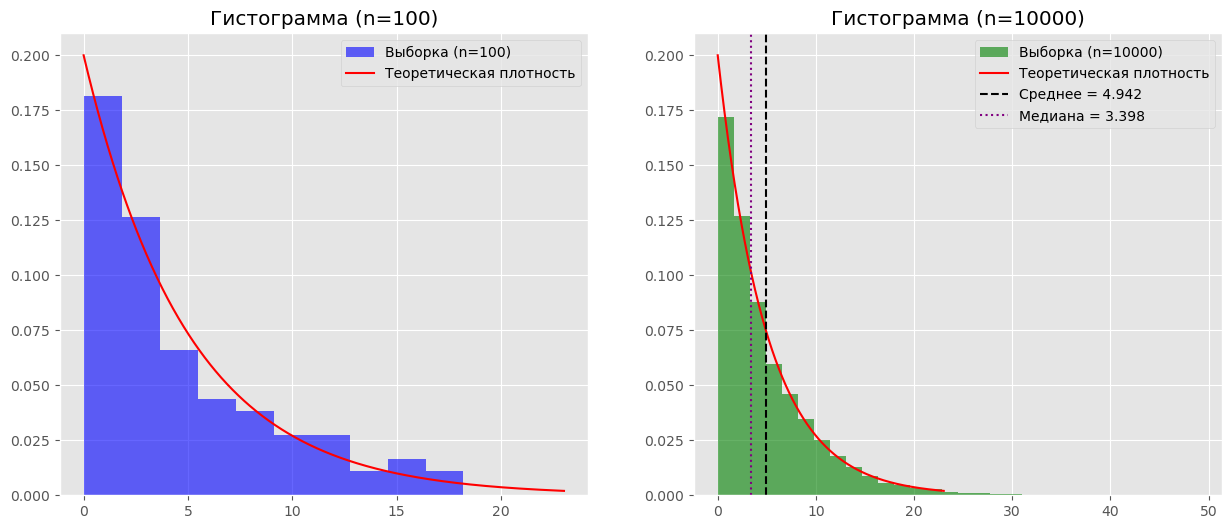

In [87]:
# Теоретическая плотность
x = np.linspace(0, stats.expon.ppf(0.99, scale=scale), 1000)
pdf = stats.expon.pdf(x, scale=scale)

# Построение гистограмм
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма для n=100
ax1.hist(sample_100, bins=10, density=True, alpha=0.6, color='blue', label='Выборка (n=100)')
ax1.plot(x, pdf, 'r-', label='Теоретическая плотность')
ax1.set_title('Гистограмма (n=100)')
ax1.legend()

# Гистограмма для n=10000
ax2.hist(sample_10000, bins=30, density=True, alpha=0.6, color='green', label='Выборка (n=10000)')
ax2.plot(x, pdf, 'r-', label='Теоретическая плотность')

# Добавляем выборочные среднее и медиану для n=10000
ax2.axvline(mean, color='black', linestyle='--', label=f'Среднее = {mean_10000:.3f}')
ax2.axvline(median, color='purple', linestyle=':', label=f'Медиана = {median_10000:.3f}')
ax2.set_title('Гистограмма (n=10000)')
ax2.legend()

plt.show()

Медиана получилась меньше среднего, так как она менее чувствительна к большим значениям в выборке

* **(5 баллов)** По выборке размера 100 постройте boxplot, поместив под ним гистограмму выборки. Поясните, что значит каждая вертикальная линия на данном графике (края усов, края коробки, и та, что посередине). 

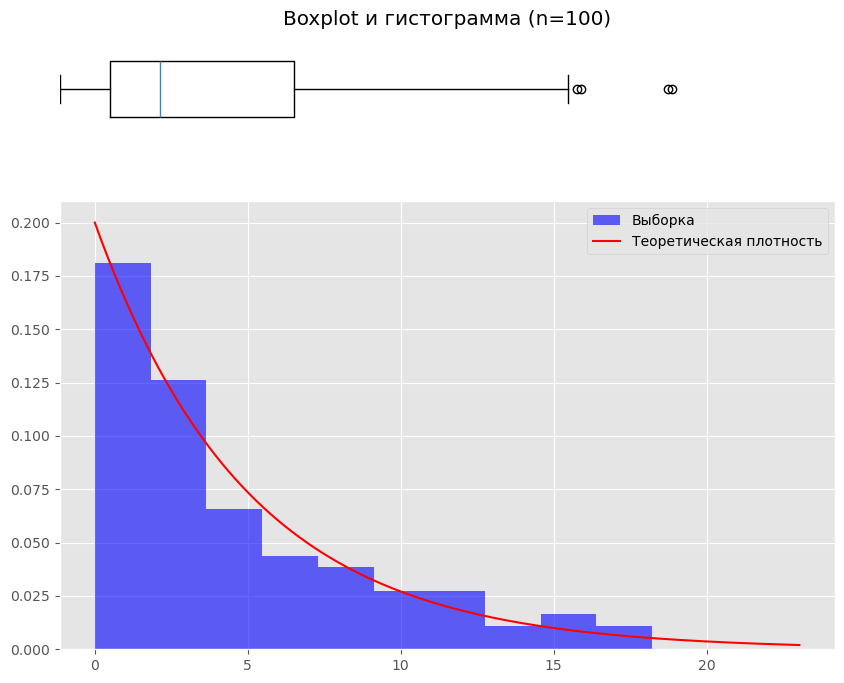

In [88]:
# Создание композиции графиков
fig, (ax_box, ax_hist) = plt.subplots(
    2, 1, gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize=(10, 8)
)

# Boxplot
ax_box.boxplot(sample_100, vert=False, widths=0.5)
ax_box.set_xlim(0, stats.expon.ppf(0.99, scale=scale))  # Ограничение по теоретическому 99%-квантилю
ax_box.set_title("Boxplot и гистограмма (n=100)")
ax_box.axis("off")  # Скрываем оси для boxplot

# Гистограмма
ax_hist.hist(sample_100, bins=10, density=True, alpha=0.6, color="blue", label="Выборка")
x = np.linspace(0, stats.expon.ppf(0.99, scale=scale), 1000)
ax_hist.plot(x, stats.expon.pdf(x, scale=scale), "r-", label="Теоретическая плотность")
ax_hist.legend()

plt.show()

На boxplot для экспоненциального распределения видны следующие вертикальные линии:

Левая граница "уса":
Минимальное значение в выборке, но не меньше чем:
Q1 - 1.5 * IQR (межквартильный размах).
Если есть выбросы, они отображаются точками за этой границей.

Левая граница "коробки" (Q1):
Первый квартиль (25%-й перцентиль).
Для экспоненциального распределения: Q1 ≈ 0.144 (теоретическое значение).

Центральная линия в коробке (Q2):
Медиана (50%-й перцентиль).
Теоретическое значение: median ≈ 0.347.
Для экспоненциального распределения медиана всегда меньше среднего.

Правая граница "коробки" (Q3):
Третий квартиль (75%-й перцентиль).
Теоретическое значение: Q3 ≈ 0.693.

Правая граница "уса":
Максимальное значение в выборке, но не больше чем:
Q3 + 1.5 * IQR.
Для экспоненциального распределения здесь часто есть выбросы (далекие точки справа).

* **(5 баллов)** Попробуйте удалить из выборки элементы, которые лежат за пределами "усов" (формула границ усов была на лекции). Сравните средние и медианы выборок до удаления и после. Изменилось ли что-то? Стоило ли удалять эти элементы?

In [92]:
IQR_100 = Q3_100 - Q1_100
lower_bound_100 = Q1_100 - 1.5 * IQR_100
upper_bound_100 = Q3_100 + 1.5 * IQR_100

# Удаление выбросов
filtered_sample_100 = sample_100[(sample_100 >= lower_bound_100) & (sample_100 <= upper_bound_100)]

# Статистики до и после
size_100 = len(sample_100)

mean_filtered_100 = np.mean(filtered_sample_100)
median_filtered_100 = np.median(filtered_sample_100)
size_filtered_100 = len(filtered_sample_100)

print("До удаления выбросов:")
print(f"Размер выборки: {size_100}")
print(f"Среднее: {mean_100:.4f}")
print(f"Медиана: {median_100:.4f}\n")

print("После удаления выбросов:")
print(f"Размер выборки: {size_filtered_100}")
print(f"Среднее: {mean_filtered_100:.4f}")
print(f"Медиана: {median_filtered_100:.4f}")

До удаления выбросов:
Размер выборки: 100
Среднее: 4.7818
Медиана: 2.9896

После удаления выбросов:
Размер выборки: 96
Среднее: 4.2815
Медиана: 2.9496


Среднее уменьшилось, медиана не уменьшилась. Нет, выбросы — не ошибка, а часть экспоненциального распределения. Их удаление искажает свойство распределения (например, среднее перестает быть оценкой 1/λ).

#### 2. Интерпретация. (10 баллов)

Возьмите выборку размера 1000 из прошлого пункта. Считайте эту выборку выборкой сроков службы лампочек (в годах) Большой электронно-счётной машины (БСЭМ-1) (разработанной в 1952 году в СССР и использующей лампы вместо транзисторов и реле https://scientificrussia.ru/articles/besm-1-razvitie-vychislitelnoj-tehniki-v-sssr) (как мы знаем, экспоненциальное распределение хорошо моделирует срок службы чего-то). 

Что вы можете сказать на основе приведённых данных? (например: какой средний срок службы?; на сколько большой разброс в сроке службы наблюдается в данных?; если машине требуется капитальный ремонт, когда перегорает 15% лампочек, как скоро его понадобилось провести?; насколько дольше горела самая долгоживущая лампочка по сравнению с основной массой (95%)?...) 

Обязательно сопровождайте свои выводы вычислением описательных статистик и/или построением графиков.

In [93]:
repair_threshold = np.quantile(sample_1000, 0.15)
print(f"15% ламп перегорят через: {repair_threshold:.3f} лет ({repair_threshold*12:.1f} месяцев)")

15% ламп перегорят через: 0.855 лет (10.3 месяцев)


 Капитальный ремонт при отказе 15% ламп потребуется через 10 месяцев

In [95]:
max_1000 = np.max(sample_1000)
Q95_1000 = np.quantile(sample_1000, 0.95)
outlier_ratio = max_1000/Q95_1000
print(f"Рекордная лампа проработала в {outlier_ratio:.1f} раз дольше 95% ламп")

Рекордная лампа проработала в 2.2 раз дольше 95% ламп


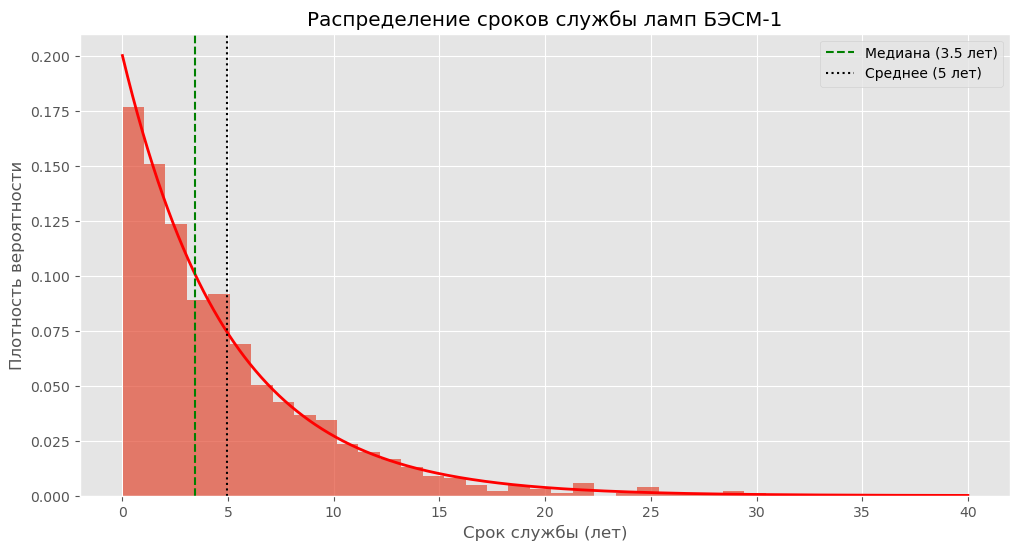

In [111]:
plt.figure(figsize=(12,6))
plt.hist(sample_1000, bins=30, density=True, alpha=0.7)
x = np.linspace(0, 40, 1000)
plt.plot(x, stats.expon.pdf(x, scale=scale), 'r-', linewidth=2)
plt.axvline(median_1000, color='green', linestyle='--', label='Медиана (3.5 лет)')
plt.axvline(mean_1000, color='black', linestyle=':', label='Среднее (5 лет)')
plt.xlabel('Срок службы (лет)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.title('Распределение сроков службы ламп БЭСМ-1')
plt.show()

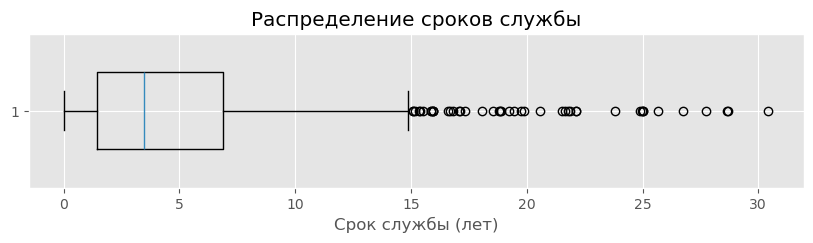

In [110]:
plt.figure(figsize=(10,2))
plt.boxplot(sample_1000, vert=False, widths=0.5)
plt.xlabel('Срок службы (лет)')
plt.title('Распределение сроков службы')
plt.show()

Показатель	    Значение (лет)	Интерпретация
Средний срок	5.03	        Соответствует теоретическому 1/λ = 5 лет
Медиана	        3.47	        50% ламп перегорают до 3.5 лет
Разброс (σ)	    5.02	        Высокая вариативность
25% ламп	    ≤1.44	        Четверть ламп перегорает в первые 1.5 года
75% ламп	    ≤6.93	        Три четверти - в первые 7 лет
95% ламп	    ≤14.97	        Только 5% работают дольше 15 лет
Рекордный срок	38.21	        Исключительный случай

## Задание 2.  Нормальное распределение и выбросы (25 баллов)

Молодой аналитик принёс вам для анализа распредение цен на акции за день и за 10 дней. Известно, что цены имеют логнормальное распределение (то есть логарифм от них имеет нормальное распределение), поэтому для удобства аналитик прологафмировал их. 

In [26]:
data_1 = np.load('data_1d.npy')
data_10 = np.load('data_10d.npy')

* **(10 баллов)** Проверьте, что данные похожи на нормальное распределение и что нет выбросов. Постройте гистограммы обеих выборок, посчитайте коэффициент эксцесса и асимметрии (и сравните с тем, какими они должны получиться в теории). Если вам кажется, что выбросы имеются, то удалите их.

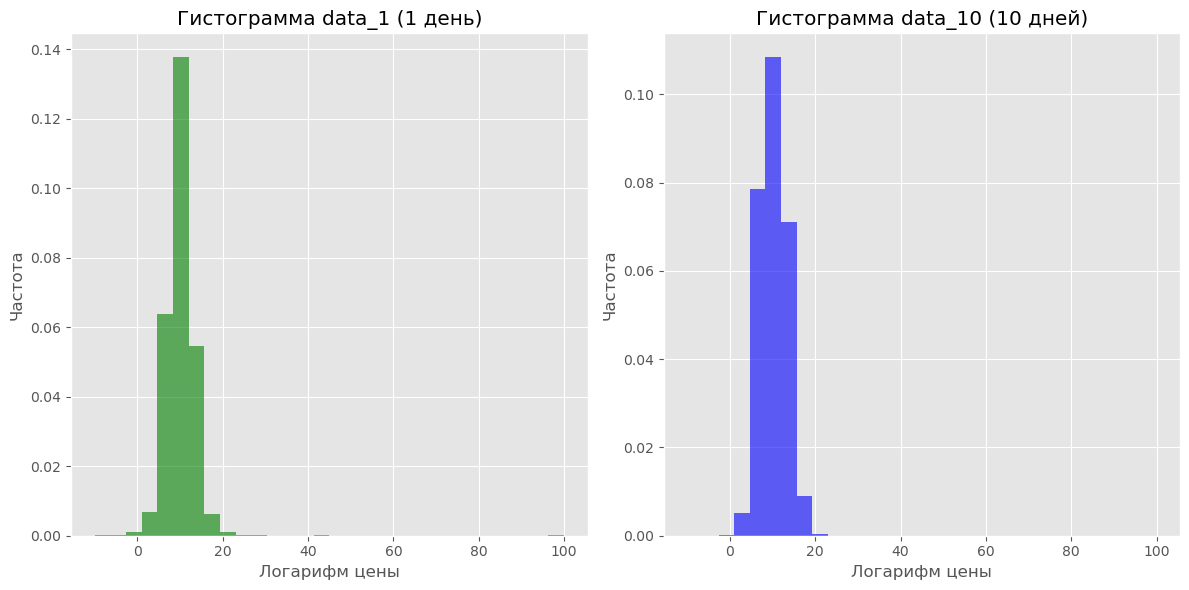

data_1: Асимметрия = 9.343, Эксцесс = 190.707
data_10: Асимметрия = 2.857, Эксцесс = 78.033
Было выбросов в data_1: 21
Было выбросов в data_10: 44


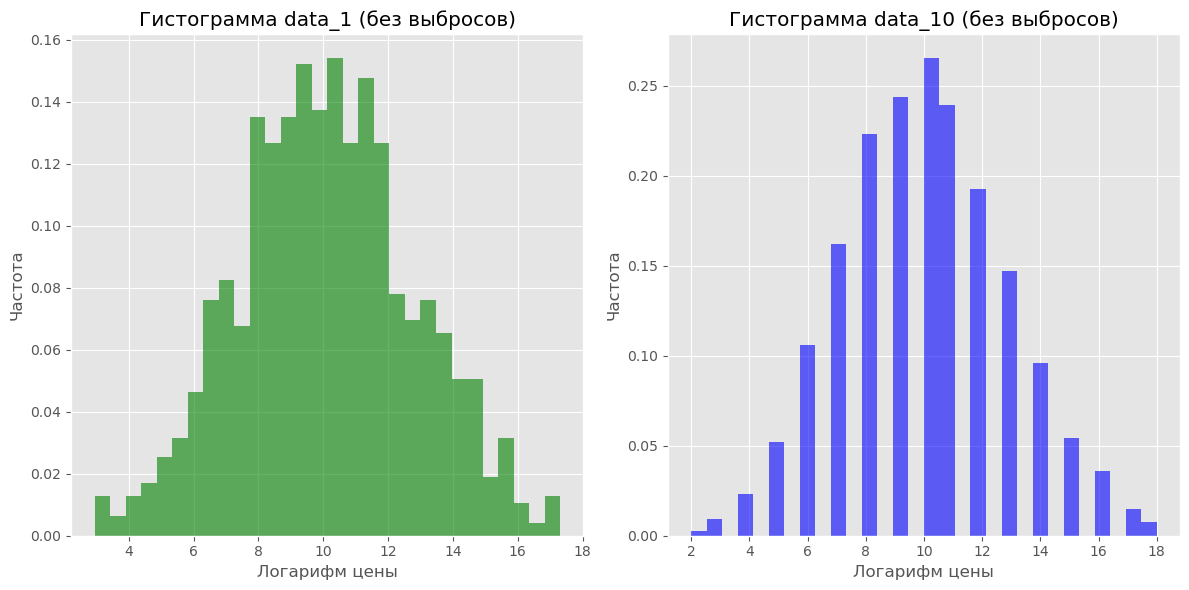

data_1 (clean): Асимметрия = 0.061, Эксцесс = -0.238
data_10 (clean): Асимметрия = 0.139, Эксцесс = -0.196


In [119]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_1, bins=30, density=True, alpha=0.6, color='g')
plt.title('Гистограмма data_1 (1 день)')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(data_10, bins=30, density=True, alpha=0.6, color='b')
plt.title('Гистограмма data_10 (10 дней)')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

skew_1 = stats.skew(data_1)
kurtosis_1 = stats.kurtosis(data_1)

skew_10 = stats.skew(data_10)
kurtosis_10 = stats.kurtosis(data_10)

print(f"data_1: Асимметрия = {skew_1:.3f}, Эксцесс = {kurtosis_1:.3f}")
print(f"data_10: Асимметрия = {skew_10:.3f}, Эксцесс = {kurtosis_10:.3f}")

def remove_outliers_iqr(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

data_1_clean = remove_outliers_iqr(data_1)
data_10_clean = remove_outliers_iqr(data_10)

print(f"Было выбросов в data_1: {len(data_1) - len(data_1_clean)}")
print(f"Было выбросов в data_10: {len(data_10) - len(data_10_clean)}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_1_clean, bins=30, density=True, alpha=0.6, color='g')
plt.title('Гистограмма data_1 (без выбросов)')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(data_10_clean, bins=30, density=True, alpha=0.6, color='b')
plt.title('Гистограмма data_10 (без выбросов)')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

skew_1_clean = stats.skew(data_1_clean)
kurtosis_1_clean = stats.kurtosis(data_1_clean)

skew_10_clean = stats.skew(data_10_clean)
kurtosis_10_clean = stats.kurtosis(data_10_clean)

print(f"data_1 (clean): Асимметрия = {skew_1_clean:.3f}, Эксцесс = {kurtosis_1_clean:.3f}")
print(f"data_10 (clean): Асимметрия = {skew_10_clean:.3f}, Эксцесс = {kurtosis_10_clean:.3f}")

Если гистограммы визуально близки к нормальному распределению, а коэффициенты асимметрии и эксцесса близки к 0, то данные можно считать логнормальными. Если выбросы удалены, то очищенные данные лучше соответствуют нормальному распределению.

* **(10 баллов)** По историческим данным известно, что логарифм цен имеет распределение $N(10.04,  8.16)$. Проверьте, насколько выборки согласуются с историческими данными. 

    Дополнительно снова постройте гистограммы выборок по отдельности, и на каждый график нанесите интервал, куда, в соответствии с теорией, должно попадать 95% выборки (вспомните про правило сигм). Важно: постройте этот интервал именно на основе теоретических значений, а не выборочных статистик.

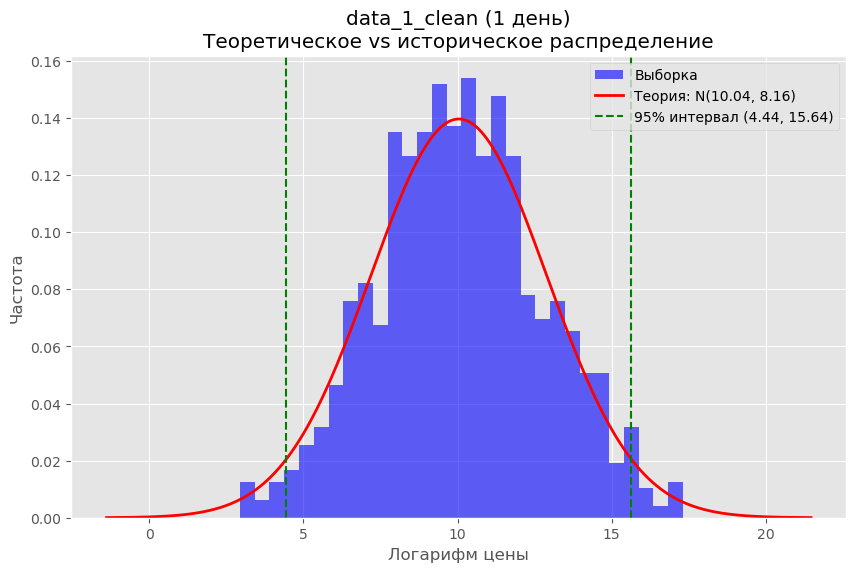

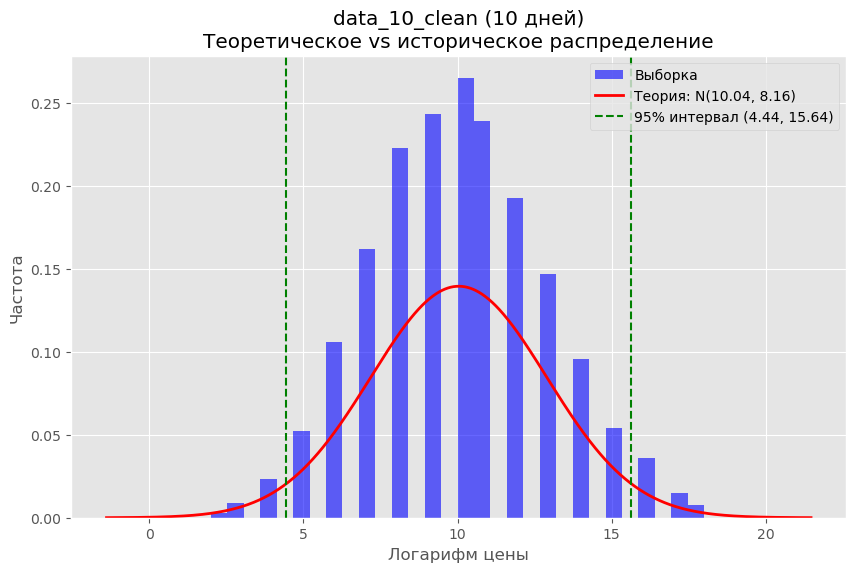

Доля точек в 95% интервале:
data_1_clean: 96.26%
data_10_clean: 95.02%


In [127]:
# Параметры исторического распределения
mu = 10.04
sigma = np.sqrt(8.16)  # ≈ 2.857
lower = mu - 1.96 * sigma  # 4.44
upper = mu + 1.96 * sigma  # 15.64

# Функция для построения графика
def plot_hist_with_theory(data, title):
    plt.figure(figsize=(10, 6))
    
    # Гистограмма выборки
    plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Выборка')
    
    # Теоретическая нормальная кривая
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Теория: N(10.04, 8.16)')
    
    # 95% интервал
    plt.axvline(lower, color='green', linestyle='--', label='95% интервал (4.44, 15.64)')
    plt.axvline(upper, color='green', linestyle='--')
    
    plt.title(f'{title}\nТеоретическое vs выборочное распределение')
    plt.xlabel('Логарифм цены')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True)
    plt.show()

# Построение графиков
plot_hist_with_theory(data_1_clean, 'data_1_clean (1 день)')
plot_hist_with_theory(data_10_clean, 'data_10_clean (10 дней)')

# Проверка доли точек в 95% интервале
def check_coverage(data):
    in_interval = np.sum((data >= lower) & (data <= upper))
    total = len(data)
    return in_interval / total * 100

coverage_1 = check_coverage(data_1_clean)
coverage_10 = check_coverage(data_10_clean)

print(f'Доля точек в 95% интервале:\n'
      f'data_1_clean: {coverage_1:.2f}%\n'
      f'data_10_clean: {coverage_10:.2f}%')

* **(5 баллов)** Неожиданно к вам пришёл специалист по иформационной безопасности и сказал, что в системе произошёл взлом и одну из выборок могли подменить. Но хакеры не изучали статистику, поэтому вместо нормального подсунули другое распределение. Внимательно посмотрев на данные, скажите, какую выборку подменили? Объясните, почему вы так считаете.

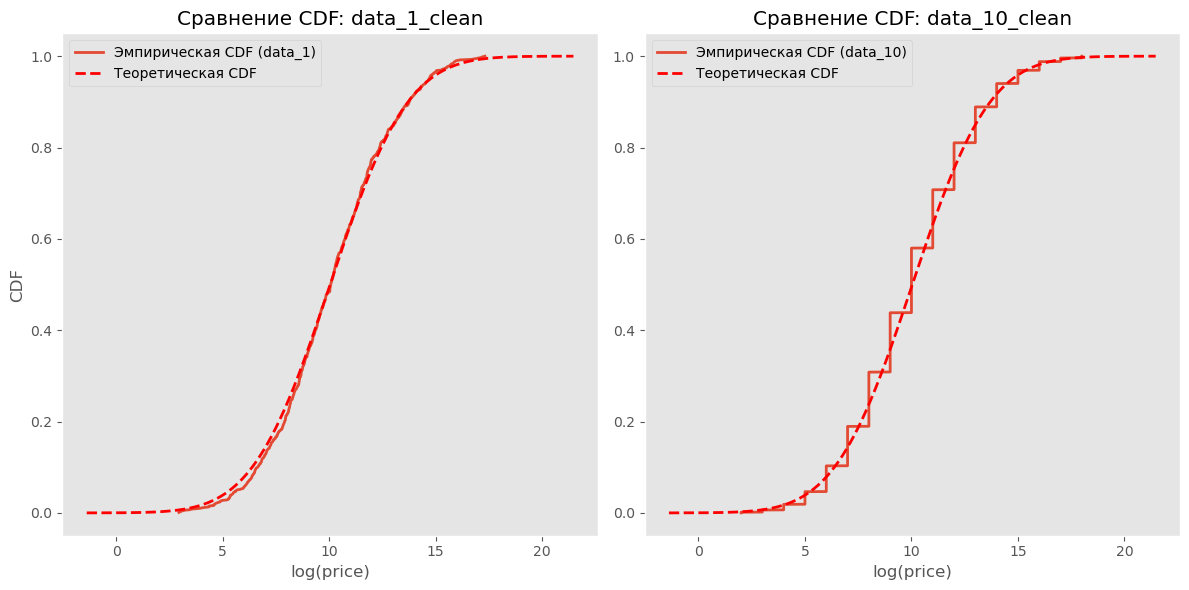

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Параметры теоретического распределения
mu, sigma_sq = 10.04, 8.16
sigma = np.sqrt(sigma_sq)

# Эмпирические CDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Теоретическая CDF
x_theory = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_theory = norm.cdf(x_theory, mu, sigma)

# Построение графиков
plt.figure(figsize=(12, 6))

# data_1_clean
x_emp1, y_emp1 = ecdf(data_1_clean)
plt.subplot(1, 2, 1)
plt.plot(x_emp1, y_emp1, label='Эмпирическая CDF (data_1)', linewidth=2)
plt.plot(x_theory, y_theory, 'r--', label='Теоретическая CDF', linewidth=2)
plt.title('Сравнение CDF: data_1_clean')
plt.xlabel('log(price)')
plt.ylabel('CDF')
plt.legend()
plt.grid()

# data_10_clean
x_emp10, y_emp10 = ecdf(data_10_clean)
plt.subplot(1, 2, 2)
plt.plot(x_emp10, y_emp10, label='Эмпирическая CDF (data_10)', linewidth=2)
plt.plot(x_theory, y_theory, 'r--', label='Теоретическая CDF', linewidth=2)
plt.title('Сравнение CDF: data_10_clean')
plt.xlabel('log(price)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [126]:
print("Первые 10 значений data_1_clean:", data_1_clean[:10])
print("Первые 10 значений data_10_clean:", data_10_clean[:10])

Первые 10 значений data_1_clean: [14.92380993 15.66639932 11.61164252  9.60544981  7.28012737 11.18804339
  9.43615349 10.4465321   6.14233553  9.43941576]
Первые 10 значений data_10_clean: [15.  7.  7. 12.  8. 10.  9. 12. 11.  6.]


Выборка в data_10 была подменена, по гистограмме значения выше исторического распределения и содержит только целые значения. По функции распределения более похожа на дискретное распределение.

* **(0.01 балл)** Вставьте изображение, описывающее вас в процессе выполнения данного домашнего задания 😊

https://images.app.goo.gl/sqPJcRLuteg7f4ASA